 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 05 : Dynamic Time Warping (DTW)  </b>


We expect you to code the dynamic time warping algorithm from scratch in this programming assignment. The skeleton code is provided for you to understand the algorithm. At the end of the assignment, you need to write an algorithm to perform an isolated digit recognition task using Dynamic Time Warping (DTW) codes. Isolated digit recognition is the task of recognizing the digit from the test speech signal having a single digit in isolation.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.











<h4> <b> Part (a). Dynamic Time Warping(DTW): </b>  In this part you need to try and implement the basic sequence matching algorithm DTW. </h4>
<dt> <h4> Two sequences A and B can be compared using a euclidean distance
<center> $ A = (x_1, x_2, x_3, ..., x_M)$ </center> <br>
<center> $ B = (y_1, y_2, y_3, ..., y_N)$ </center> <br> </h4> </dt>
<dt> <h4> Now the distance is computed as </h4> </dt>
<center> $ D(A,B) = \frac{1}{N} \sum_1^N || x_n - y_n||$</center> </h4> </dt>
<dt> <h4> There are two main issues </h4> </dt>
<dd> <h4> 1. What if the sequences are not aligned in time ?</h4> </dt>
<dd> <h4> 2. What if the sequences have varying lengths ?</h4> </dt>
<dt> <h4> The non-linear alignment path produces a better similarity measure. </h4> </dt>

![picture](https://drive.google.com/uc?export=view&id=1XWTK0XUpDIuf-5nbe7pk6uPx29-22zF0)

<dt> <h4> <b> Algorithm </b> </h4> </dt>
<dt> <h4>  1. Compute distance matrix $D_{M\times N}$ between A and B </h4> </dt>
<dt> <h4>  2. Compute accumulated distance matrix $C_{M\times N}$ between A and B </h4> </dt>
<dd> <h4>  ~ Initialize: C(0,0) = D(0,0) </h4> </dd>
<dd> <h4>  ~ for i=1,2,..M and j=1,2,...N  <dd> <h4>  ~ Update C <dd> <h4> C(i,j) = D(i,j) + min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> <dd> <h4>  ~ Store the best Path <dd> <h4> P(i,j) = arg min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> </h4> </dd>
<dt> <h4>  3. C(M,N) gives the similarity measure </h4> </dt>
<dt> <h4>  4. Backtrack the best alignment path <br> <center> $ q_T^* = (M,N) \\ q_{t-1}^* = P(q_t^*) \qquad t = T,T-1,....1$ </center></h4> </dt>
<dt> <h4> <b> Programming question </b> </h4> </dt>
<dt> <h4>  1. Consider the following two sequences $A = [4,3,7,0,2,6,5]$, and $B = [3,7,1,6,1,5,4,4]$. Write a DTW algorithm to find the optimal similarity/distance between them. </h4> </dt>
<dd> <h4> - Compute the distance matrix between the two sequences </dd> </h4>
<dd> <h4> - Compute the accumulative distance matrix </dd> </h4>
<dd> <h4> - Backtrack from the accumulative distance matrix to get the optimal path and thereby compute the optimal distance </dd> </h4>
<dd> <h4> - Plot the optimal path on both the distance matrix and cumulative distance matrix to verify the DTW codes </dd> </h4>



In [ ]:
#Pavankumar shinde
#co22btech11008
# Assignment 5:programming assignment on DTW.


In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections


In [ ]:
A=[4,3,7,0,2,6,5]
B=[3,7,1,6,1,5,4,4]

In [ ]:


###########################################################
#Function to obtain the optimal distance and path between two sequences
###########################################################
def min(x, y, z):
    min_val = None
    index = 1
    if x > y:
        min_val = y
        index = 2
    else:
        min_val = x
        index = 1

    if min_val > z:
        min_val = z
        index = 3
    return min_val, index

def DTW(sequence1,sequence2):
    #######################################################
    # Input  : Two sequences
    # Output : DTW path and optimal distance
    #######################################################


    #######################################################
    # Code snippet to create the cumulative distance matrix
    distances=[]
    #Iterate through the sequence of points in sequences and compute the distance between the sequences.
    for i in range(len(sequence1)):
        dis=[]
        for j in range(len(sequence2)):
            dis.append(np.linalg.norm((sequence1[i]-sequence2[j])**2))    #Compute the distance between the two points
        distances.append(dis)
    distances=np.array(distances)
    # print(distances)


    # Initialize the cumulative distance matrix
    cumulative_matrix = np.zeros((len(sequence1), len(sequence2)))


    for i in range(len(sequence1)):
        for j in range(len(sequence2)):

            if i == 0 and j == 0:
                cumulative_matrix[i][j] = distances[i][j]
            elif i == 0:
                cumulative_matrix[i][j] = distances[i][j] + cumulative_matrix[i][j - 1]

            elif j == 0:
                cumulative_matrix[i][j] = distances[i][j] + cumulative_matrix[i - 1][j]
            else:

                minimum ,index=min(cumulative_matrix[i - 1][j],cumulative_matrix[i - 1][j - 1],cumulative_matrix[i][j - 1])
                #Add min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1]) to "current_distance" and assign it to "DTW_cumulate_Matrix[i,j]"

                cumulative_matrix[i][j] = distances[i][j] + minimum
    # print(cumulative_matrix)

    #######################################################
    # Return optimal distance and optimal dtw path
    #######################################################
    return cumulative_matrix[-1][-1]


optimal_distance=DTW(A,B)




In [ ]:
optimal_distance

20.0

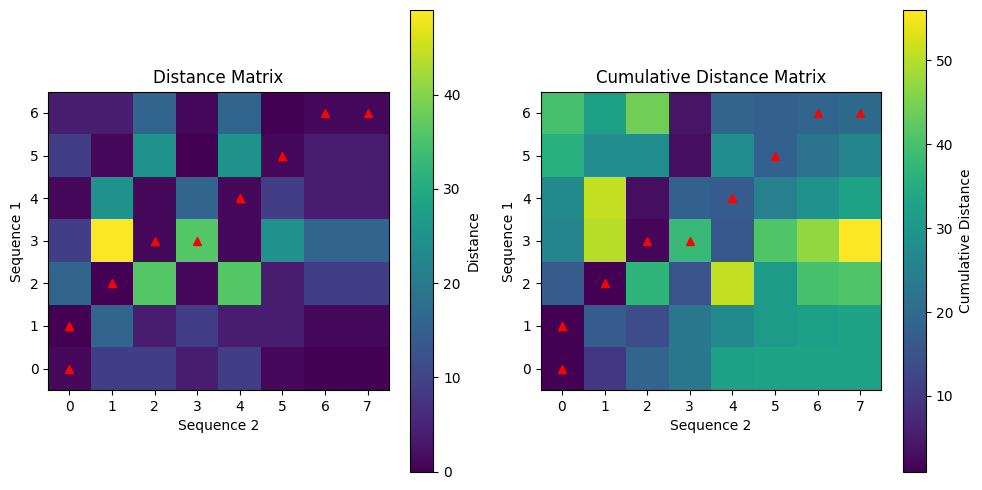

In [ ]:

def plotDTW(sequence1,sequence2):
    #######################################################
    # Input  : Two sequences
    # Output : DTW path and optimal distance
    #######################################################


    #######################################################
    # Code snippet to create the cumulative distance matrix
    distances=[]
    #Iterate through the sequence of points in sequences and compute the distance between the sequences.
    for i in range(len(sequence1)):
        dis=[]
        for j in range(len(sequence2)):
            dis.append(np.linalg.norm((sequence1[i]-sequence2[j])**2))    #Compute the distance between the two points
        distances.append(dis)
    distances=np.array(distances)
    # print(distances)


    # Initialize the cumulative distance matrix
    cumulative_matrix = np.zeros((len(sequence1), len(sequence2)))

    #Store the required indexes to obtain the optimal path
    path_i=np.zeros((distances.shape))
    path_j=np.zeros((distances.shape))

    for i in range(len(sequence1)):
        for j in range(len(sequence2)):

            if i == 0 and j == 0:
                cumulative_matrix[i][j] = distances[i][j]
                path_i[i][j]=i
                path_j[i][j]=j
            elif i == 0:
                cumulative_matrix[i][j] = distances[i][j] + cumulative_matrix[i][j - 1]
                path_i[i][j]=i
                path_j[i][j]=j-1
            elif j == 0:
                cumulative_matrix[i][j] = distances[i][j] + cumulative_matrix[i - 1][j]
                path_i[i][j]=i-1
                path_j[i][j]=j
            else:

                minimum ,index=min(cumulative_matrix[i - 1][j],cumulative_matrix[i - 1][j - 1],cumulative_matrix[i][j - 1])
                Add min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1]) to "current_distance" and assign it to "DTW_cumulate_Matrix[i,j]"

                cumulative_matrix[i][j] = distances[i][j] + minimum

                if index == 1:
                    path_i[i][j] = i - 1
                    path_j[i][j] = j
                elif index == 2:
                    path_i[i][j] = i - 1
                    path_j[i][j] = j - 1
                elif index == 3:
                    path_i[i][j] = i
                    path_j[i][j] = j - 1
    # print(cumulative_matrix)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(distances, origin='lower', cmap='viridis', interpolation='nearest')
    plt.title('Distance Matrix')
    plt.colorbar(label='Distance')


    # Plot the optimal path
    i = len(sequence1) - 1
    j = len(sequence2) - 1
    plt.plot(j, i, color='red', marker='^')
    while (1):
        i = int(path_i[i][j])
        j = int(path_j[i][j])
        plt.plot(j, i, color='red', marker='^')
        if(i==0 and j==0):
          break

    plt.xlabel('Sequence 2')
    plt.ylabel('Sequence 1')

    # Plot the cumulative distance matrix
    plt.subplot(1, 2, 2)
    plt.imshow(cumulative_matrix, origin='lower', cmap='viridis', interpolation='nearest')
    plt.title('Cumulative Distance Matrix')
    plt.colorbar(label='Cumulative Distance')


    # Plot the optimal path
    i = len(sequence1) - 1
    j = len(sequence2) - 1
    plt.plot(j, i, color='red', marker='^')
    while (1):
        i = int(path_i[i][j])
        j = int(path_j[i][j])
        plt.plot(j, i, color='red', marker='^')
        if(i==0 and j==0):
          break
    plt.xlabel('Sequence 2')
    plt.ylabel('Sequence 1')

    plt.tight_layout()
    plt.show()

    #######################################################
    # Return optimal distance and optimal dtw path
    #######################################################
    return cumulative_matrix[-1][-1],path_i,path_j


optimal_distance, path_i, path_j=plotDTW(A,B)




<b> Report your observations </b>

1.The DTW algorithm accounts for variability in the temporal alignment of sequences by allowing for warping or stretching of the time axis. This sensitivity to sequence variability enables the algorithm to effectively compare sequences that may have different lengths or exhibit temporal distortions.


2.The computational complexity of the DTW algorithm depends on the lengths of the input sequences. Since the algorithm involves computing a distance matrix and then iteratively filling in a cumulative distance matrix, the time complexity is typically
O(n×m), where
n and
m are the lengths of the two sequences.


3.The optimal path obtained from the cumulative distance matrix represents the alignment between the two sequences that minimizes the total distance. By backtracking from the bottom-right corner to the top-left corner of the matrix, the algorithm identifies this optimal path.


4.The consistency of the optimal path ensures that the algorithm accurately captures the similarity between the sequences, even in the presence of noise or irregularities.








<dt> <h4> <b> Part (b): </b> In this part of the assignment, we expect you to build the Isolated digit recognition system with the help of the above written DTW algorithm. </dt> </h4>

![picture](https://drive.google.com/uc?export=view&id=1nGtWwbDg8PJBNwck_dUt2mmsCBshrGYc)



<dt> <h4> 1. Record one repetition each of the digits zero, one, two, three, four, five, six, seven, eight, and nine. The modules to record the voice in online mode are provided here. If you are not comfortable using the online recording modules, you can record the digits offline and access them in google colab through proper codes. </dt> </h4>
<dt> <h4> 2. Record three further repetitions of the same digits (Isolated words) as test data. </dt> </h4>  
<dt> <h4> 3. The codes to compute the signal's templates (Mel Frequency Cepstral Coefficients) are provided. Please use them to obtain the templates of the speech signals. </dt> </h4>  
<dt> <h4> 4. Write an algorithm to perform isolated digit recognition with the help of the DTW codes. </dt> </h4>
<dt> <h4> 5. Take two pairs such that one pair is the repetition of the same digit and another one is two different digits. Plot the optimal DTW path on distance and cumulative distance matrices for both cases.   </dt> </h4>
<dt> <h4> 6. Evaluate the digit recognition accuracy, i.e., the percentage of correctly recognized trials out of each digit's total number of attempts. </dt> </h4>
<dt> <h4> 7. Create a confusion matrix and report the most confusing digits. </dt> </h4>


**Module to record the voice in online mode**

In [ ]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  audio = AudioSegment.from_file(BytesIO(b))
  return audio


**Recording Train data**
1. Record one repetition each of the digits zero, one, two, three, four, five, six, seven, eight, and nine. The modules to record the voice in online mode are provided here. If you are not comfortable using the online recording modules, you can record the digits offline and access them in google colab through proper codes.

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.io.wavfile
import io
import os
from IPython.display import Audio

#### Please comment below line, if you already uploaded the 'recording.wav' in '/content/'
# !rm recording.wav

if not os.path.exists('traincases'):
    os.makedirs('traincases')

for i in range(10):
#### You can run this module in the loop to record more repetitions of the digits.
  if os.path.isfile(f'traincases/recording{i}.wav'):
      print("wavefile exists, later part of the code uses 'recording.wav' as input speech")
  else:
      print("say next ",i)
      print("Recording the digits")
      wav = record(3.0) #It will record three seconds of your speech. You can change the duration.
      wav = wav.set_frame_rate(16000)
      sig=wav.get_array_of_samples()
      samples=np.array(sig).T.astype(np.float32)
      fp_arr = np.array(samples).T.astype(np.float32)
      fp_arr /= np.iinfo(sig.typecode).max
      scipy.io.wavfile.write(f'traincases/recording{i}.wav', 16000, fp_arr) #Please change the name.

  wn = Audio(f'traincases/recording{i}.wav', autoplay=True)
  # display(wn)



wavefile exists, later part of the code uses 'recording.wav' as input speech
wavefile exists, later part of the code uses 'recording.wav' as input speech
wavefile exists, later part of the code uses 'recording.wav' as input speech
wavefile exists, later part of the code uses 'recording.wav' as input speech
wavefile exists, later part of the code uses 'recording.wav' as input speech
wavefile exists, later part of the code uses 'recording.wav' as input speech
wavefile exists, later part of the code uses 'recording.wav' as input speech
wavefile exists, later part of the code uses 'recording.wav' as input speech
wavefile exists, later part of the code uses 'recording.wav' as input speech
wavefile exists, later part of the code uses 'recording.wav' as input speech


**Algorithm to perform isolated digit recognition**

**Recording testing data**

2. Record three further repetitions of the same digits (Isolated words) as test data.


In [ ]:
# import os
# import numpy as np
# import scipy.io.wavfile
# from pydub import AudioSegment
# from record import record  # Assuming you have a function record defined somewhere

if not os.path.exists('testcases'):
    os.makedirs('testcases')

for j in range(3):
    for i in range(10):
        # You can run this module in the loop to record more repetitions of the digits.
        filename = f'testcases/recording{i}__{j}.wav'
        if os.path.isfile(filename):
            print("Wavefile exists. Later part of the code uses 'recording.wav' as input speech.")
        else:
            print("Recording the digits")
            print("Say next",i)
            wav = record(3.0)  # It will record three seconds of your speech. You can change the duration.
            wav = wav.set_frame_rate(16000)
            sig = wav.get_array_of_samples()
            samples = np.array(sig).T.astype(np.float32)
            fp_arr = np.array(samples).T.astype(np.float32)
            fp_arr /= np.iinfo(sig.typecode).max
            scipy.io.wavfile.write(filename, 16000, fp_arr)  # Please change the name.

        wn = AudioSegment.from_wav(filename)
        wn.export(filename, format="wav")  # Save as wav file.



Wavefile exists. Later part of the code uses 'recording.wav' as input speech.
Wavefile exists. Later part of the code uses 'recording.wav' as input speech.
Recording the digits
Say next 2


<IPython.core.display.Javascript object>

Wavefile exists. Later part of the code uses 'recording.wav' as input speech.
Wavefile exists. Later part of the code uses 'recording.wav' as input speech.
Wavefile exists. Later part of the code uses 'recording.wav' as input speech.
Wavefile exists. Later part of the code uses 'recording.wav' as input speech.
Wavefile exists. Later part of the code uses 'recording.wav' as input speech.
Wavefile exists. Later part of the code uses 'recording.wav' as input speech.
Recording the digits
Say next 9


<IPython.core.display.Javascript object>

Wavefile exists. Later part of the code uses 'recording.wav' as input speech.
Recording the digits
Say next 1


<IPython.core.display.Javascript object>

Recording the digits
Say next 2


<IPython.core.display.Javascript object>

Recording the digits
Say next 3


<IPython.core.display.Javascript object>

Recording the digits
Say next 4


<IPython.core.display.Javascript object>

Recording the digits
Say next 5


<IPython.core.display.Javascript object>

Recording the digits
Say next 6


<IPython.core.display.Javascript object>

Recording the digits
Say next 7


<IPython.core.display.Javascript object>

Recording the digits
Say next 8


<IPython.core.display.Javascript object>

Recording the digits
Say next 9


<IPython.core.display.Javascript object>

Recording the digits
Say next 0


<IPython.core.display.Javascript object>

Recording the digits
Say next 1


<IPython.core.display.Javascript object>

Recording the digits
Say next 2


<IPython.core.display.Javascript object>

Recording the digits
Say next 3


<IPython.core.display.Javascript object>

Recording the digits
Say next 4


<IPython.core.display.Javascript object>

Recording the digits
Say next 5


<IPython.core.display.Javascript object>

Recording the digits
Say next 6


<IPython.core.display.Javascript object>

Recording the digits
Say next 7


<IPython.core.display.Javascript object>

Recording the digits
Say next 8


<IPython.core.display.Javascript object>

Recording the digits
Say next 9


<IPython.core.display.Javascript object>

**Task 2:part 3**
3. The codes to compute the signal's templates (Mel Frequency Cepstral Coefficients) are provided. Please use them to obtain the templates of the speech signals.

In [ ]:
import scipy.io.wavfile as wav
!pip -q install python_speech_features
!pip -q install speechpy
from python_speech_features import mfcc
import speechpy

In [ ]:
def mfcc(file):
  (rate,sig) = wav.read(file)
  sig = sig - np.mean(sig)
  mfcc_feat = speechpy.feature.mfcc(sig, rate, frame_length=0.025, frame_stride=0.01, num_filters=40, fft_length=512, low_frequency=20, high_frequency=4000)
  mfcc_feat_cmvn = speechpy.processing.cmvnw(mfcc_feat, win_size=301, variance_normalization=False)
  return mfcc_feat_cmvn

In [ ]:
DTW(mfcc('traincases/recording4.wav'),mfcc('traincases/recording5.wav'))

9610.64373588562

**task 2 : part 4**
4. Write an algorithm to perform isolated digit recognition with the help of the DTW codes.

In [ ]:
def digit_recognitioin(file):
  a=mfcc(file)
  min=10000000
  digit=None
  for i in range(10):
    b=mfcc(f'traincases/recording{i}.wav')
    distance=DTW(a,b)
    # print(distance)
    if(distance<min):
      min=distance
      digit=i
  return digit



In [ ]:
print(digit_recognitioin('testcases/recording0__0.wav'))

0


In [ ]:
print(digit_recognitioin('testcases/recording7__0.wav'))

7


**Task 2 :part 5**
5. Take two pairs such that one pair is the repetition of the same digit and another one is two different digits. Plot the optimal DTW path on distance and cumulative distance matrices for both cases.

plot for the repetition of the same digit:


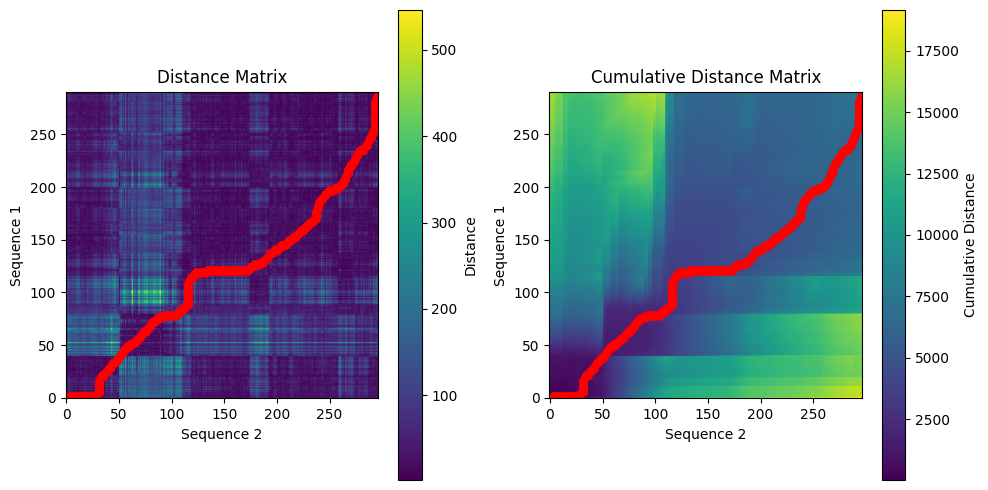

plot for two diffient digits:


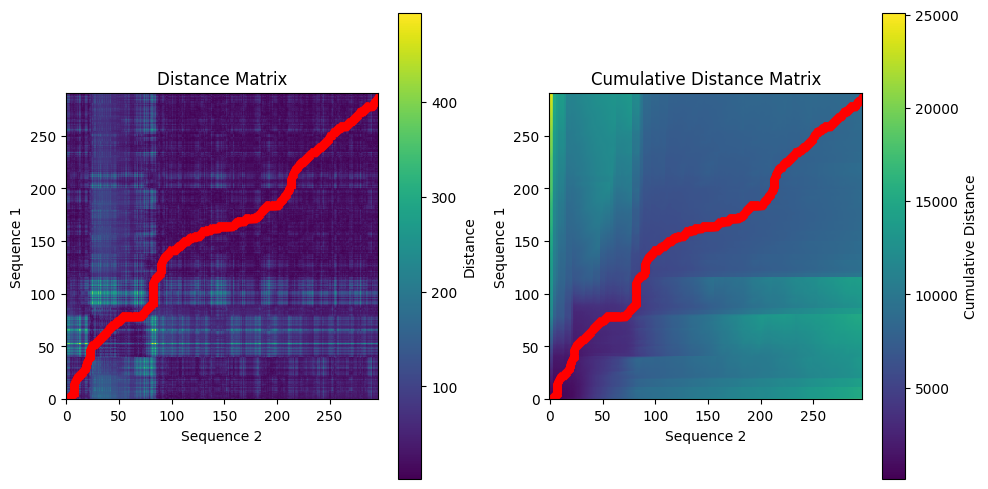

(8927.137986421585,
 array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   1., ...,   1.,   1.,   1.],
        [  1.,   1.,   1., ...,   2.,   2.,   2.],
        ...,
        [287., 287., 287., ..., 287., 287., 287.],
        [288., 288., 288., ..., 288., 288., 288.],
        [289., 289., 289., ..., 289., 289., 289.]]),
 array([[  0.,   0.,   1., ..., 293., 294., 295.],
        [  0.,   0.,   1., ..., 293., 294., 295.],
        [  0.,   1.,   1., ..., 293., 294., 295.],
        ...,
        [  0.,   1.,   1., ..., 293., 294., 296.],
        [  0.,   1.,   2., ..., 294., 294., 296.],
        [  0.,   1.,   2., ..., 294., 295., 296.]]))

In [ ]:
pair_1=['traincases/recording4.wav','testcases/recording4__0.wav']
pair_2=['traincases/recording4.wav','traincases/recording5.wav']


print("plot for the repetition of the same digit:")
plotDTW(mfcc(pair_1[0]),mfcc(pair_1[1]))


print("plot for two diffient digits:")
plotDTW(mfcc(pair_2[0]),mfcc(pair_2[1]))


**Task 2:part 6**

**Compute the required metrics ( digit recognition accuracy ) and illustrations ( confusion matrix )**

6. Evaluate the digit recognition accuracy, i.e., the percentage of correctly recognized trials out of each digit's total number of attempts.

In [ ]:
confusion_matrix=np.zeros((10,10))
count=0
for i in range(10):
  for j in range(3):
    prediction=digit_recognitioin(f'testcases/recording{i}__0.wav')
    confusion_matrix[i][prediction]+=1
    if(i==prediction):
      count+=1

print("percentage of accuracy:",(count/30 ) *100)


percentage of accuracy: 60.0


**Task 2: part 7**:
7. Create a confusion matrix and report the most confusing digits

In [ ]:
confusion_matrix

array([[3., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 3., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 3., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 3., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 3., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 3.],
       [0., 0., 3., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 3., 0., 0.],
       [0., 0., 0., 3., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 3.]])

most confusing digits: 4,5,6,8


<b> Report your observations </b>

1.Despite variations in pronunciation, accent, or recording conditions, DTW can effectively recognize isolated digits by aligning and comparing their temporal patterns.

2.The performance of the digit recognition system heavily relies on the quality and diversity of the training data

3.While DTW provides accurate recognition of isolated digits, its computational complexity increases with longer sequences and larger datasets.




<dt> <h4> <b> Part (c): </b> In this part of the assignment, we expect you to evaluate the above-written digit recognition system performance on different test cases and understand the pros and cons of the DTW algorithm.  </dt> </h4>

[link to TDIGITS data](https://drive.google.com/drive/folders/1oV3jrUiug0-SwWLOdLtbXA6hzqYYIlI7?usp=sharing)


<dt> <h4> 1. Evaluate the performance of digit recognition systems on the TDGIT database shared with you and report the accuracy. </dt> </h4>
<dt> <h4> 2. Evaluate the performance in different cases, i.e., a pair of templates with the same speaker and a different speaker. </dt> </h4>
<dt> <h4> 3. Please report some of the changes to improve the system performance. </dt> </h4>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New Section

In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections


In [ ]:

#Performance evaluation of Isolated digit recognition system on TDIGITS data
mainFolder='Tdigits'
folder='jackson'
count=0
for i in range(10):
    for j in range(10):
        file = f'/content/{mainFolder}/{folder}/{j}_{folder}_{i}.wav'
        wn = Audio(file, autoplay=True)
        if(j==digit_recognitioin(file)):
          count+=1

print(count)
folder='nicolas'
for i in range(10):
    for j in range(10):
        file = f'/content/{mainFolder}/{folder}/{j}_{folder}_{i}.wav'
        wn = Audio(file, autoplay=True)
        # display(wn)
        if(j==digit_recognitioin(file)):
          count+=1
        # else:
          # print(j,"is wrongly recognized")
print(count)
folder='yweweler'
for i in range(10):
    for j in range(10):
        file = f'/content/{mainFolder}/{folder}/{j}_{folder}_{i}.wav'
        wn = Audio(file, autoplay=True)
        # display(wn)
        if(j==digit_recognitioin(file)):
          count+=1
        # else:
          # print(j)
        # print(count)
print(count)
folder='theo'
for i in range(10):
    for j in range(10):
        file = f'/content/{mainFolder}/{folder}/{j}_{folder}_{i}.wav'
        wn = Audio(file, autoplay=True)
        # display(wn)
        if(j==digit_recognitioin(file)):
          count+=1

print(count)






6
22
29
48


In [ ]:
print("Percern tage accuracy while I used my recorded digits for reference:",count/400 *100)

Percern tage accuracy while I used my recorded digits for reference: 12.0


In [ ]:


#Performance evaluation of Isolated digit recognition system on TDIGITS data, with the reference and test signal coming from the same speaker
mainFolder='Tdigits'
folder='jackson'

def digit_recognitioin(file):
  a=mfcc(file)
  min=10000000
  digit=None
  for i in range(10):
    b=mfcc(f'/content/{mainFolder}/{folder}/{i}_{folder}_0.wav')
    distance=DTW(a,b)
    # print(distance)
    if(distance<min):
      min=distance
      digit=i
  return digit


count=0
for i in range(50):
    for j in range(10):
        file = f'/content/{mainFolder}/{folder}/{j}_{folder}_{i}.wav'
        wn = Audio(file, autoplay=True)
        if(j==digit_recognitioin(file)):
          count+=1
print("percentage_of accuracy:",count/500 *100);








percentage_of accuracy: 87.2


In [ ]:



#Performance evaluation of Isolated digit recognition system on TDIGITS data, with the reference and test signal coming from different speakers
mainFolder='Tdigits'
folder='jackson'

def digit_recognitioin(file):
  a=mfcc(file)
  min=10000000
  digit=None
  for i in range(10):
    b=mfcc(f'/content/{mainFolder}/{folder}/{i}_{folder}_0.wav')
    distance=DTW(a,b)
    # print(distance)
    if(distance<min):
      min=distance
      digit=i
  return digit


count=0
for i in range(50):
    for j in range(10):
        file = f'/content/{mainFolder}/nicolas/{j}_nicolas_{i}.wav'
        wn = Audio(file, autoplay=True)
        if(j==digit_recognitioin(file)):
          count+=1
print("percentage_of accuracy:",count/500 *100);












percentage_of accuracy: 39.4


In [ ]:

#Suggest some of the changes to improve the system performance.


#for reference data take 3 -4  digits from each.

def digit_recognitioin(file):
  a=mfcc(file)
  min=10000000
  mainFolder='Tdigits'
  folder='jackson'
  digit=None
  for i in range(2):
    b=mfcc(f'/content/{mainFolder}/{folder}/{i}_{folder}_0.wav')
    distance=DTW(a,b)
    # print(distance)
    if(distance<min):
      min=distance
      digit=i
  folder='theo'0.0
  for i in range(2,4):
    b=mfcc(f'/content/{mainFolder}/{folder}/{i}_{folder}_0.wav')
    distance=DTW(a,b)
    # print(distance)
    if(distance<min):
      min=distance
      digit=i
  folder='nicolas'
  for i in range(4,8):
    b=mfcc(f'/content/{mainFolder}/{folder}/{i}_{folder}_0.wav')
    distance=DTW(a,b)
    # print(distance)
    if(distance<min):
      min=distance
      digit=i
  folder='yweweler'
  for i in range(8,10):
    b=mfcc(f'/content/{mainFolder}/{folder}/{i}_{folder}_0.wav')
    distance=DTW(a,b)
    # print(distance)
    if(distance<min):
      min=distance
      digit=i

  return digit


count=0
for i in range(50):
    for j in range(10):
        file = f'/content/{mainFolder}/nicolas/{j}_nicolas_{i}.wav'
        wn = Audio(file, autoplay=True)
        if(j==digit_recognitioin(file)):
          count+=1
print("percentage_of accuracy:",count/500 *100);



percentage_of accuracy: 51.800000000000004


<b> Report your observations </b>



1.The performance of the digit recognition system vary significantly across different speakers.

2.Increasing the variety of speakers and recording conditions in the training dataset can lead to better recognition accuracy.

3.accuracy is more when reference data and testing digits belongs to same speaker.



